In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from dorchester import dotdensity

In [4]:
import fiona

In [5]:
from shapely.ops import unary_union
from shapely.geometry import shape

In [6]:
SUFFOLK = "../tests/data/suffolk.geojson"

In [23]:
BLUE = '#6699cc'
GREEN = '#00FF00'
GRAY = '#999999'

In [8]:
def plot(feature, points):
    coords = [(p[0], p[1]) for p in points]
    x, y = zip(*coords)
    plt.plot(*zip(*feature['geometry']['coordinates'][0]), linewidth=.5, color=GRAY)
    plt.scatter(x, y, s=1, c=BLUE)

In [9]:
with fiona.open(SUFFOLK) as src:
    print(len(src))

9170


In [10]:
with fiona.open(SUFFOLK) as src:
    blocks = [shape(f["geometry"]) for f in src]
    boundary = unary_union(blocks)

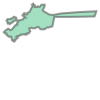

In [11]:
boundary

In [12]:
with fiona.open(SUFFOLK) as src:
    populated = [b for b in src if b['properties']['POP10'] > 0]

In [13]:
block = populated[0]

In [14]:
block

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('id', '126596'),
              ('BLOCKCE', '1019'),
              ('BLOCKID10', '250251304041019'),
              ('COUNTYFP10', '025'),
              ('HOUSING10', 14),
              ('PARTFLG', 'N'),
              ('POP10', 45),
              ('STATEFP10', '25'),
              ('TRACTCE10', '130404')]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(-71.157072, 42.261327),
    (-71.157196, 42.26181),
    (-71.157279, 42.262166),
    (-71.15749, 42.263064),
    (-71.15752499999999, 42.263183999999995),
    (-71.157609, 42.263433),
    (-71.157761, 42.263738),
    (-71.157552, 42.263797),
    (-71.15745199999999, 42.263785999999996),
    (-71.157381, 42.263743),
    (-71.15720999999999, 42.263616),
    (-71.156892, 42.263312),
    (-71.156545, 42.263016),
    (-71.15630399999999, 42.26282),
    (-71.15590999999999, 42.262544999999996),
    (-71.156427, 42.26201),
    (-71.157072, 42.261327)]]}}

In [15]:
points, err = dotdensity.points_in_feature(block, ['POP10'])

In [16]:
points

[Point(x=-71.15770514615728, y=42.26370194187794, group='POP10', fid='1'),
 Point(x=-71.15741521787608, y=42.26355430956913, group='POP10', fid='1'),
 Point(x=-71.1573407265205, y=42.263536530530054, group='POP10', fid='1'),
 Point(x=-71.15722581894133, y=42.26338534846238, group='POP10', fid='1'),
 Point(x=-71.15720070359357, y=42.263266714588845, group='POP10', fid='1'),
 Point(x=-71.15724260559162, y=42.263431518130005, group='POP10', fid='1'),
 Point(x=-71.1562943150047, y=42.26240075465211, group='POP10', fid='1'),
 Point(x=-71.15626213811183, y=42.26231985262086, group='POP10', fid='1'),
 Point(x=-71.1562903172372, y=42.26237919760041, group='POP10', fid='1'),
 Point(x=-71.15614192881503, y=42.26246944464509, group='POP10', fid='1'),
 Point(x=-71.15697347584855, y=42.2615797632884, group='POP10', fid='1'),
 Point(x=-71.1571190302817, y=42.261675380717676, group='POP10', fid='1'),
 Point(x=-71.15701008374367, y=42.26177761226839, group='POP10', fid='1'),
 Point(x=-71.1571858609446

In [17]:
err

Error(offset=0, group=None, fid='1')

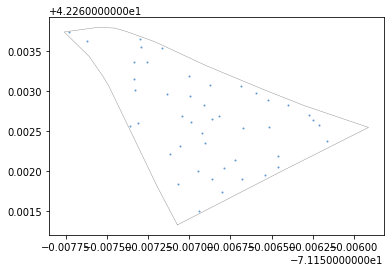

In [19]:
points, err = dotdensity.points_in_feature(block, ['POP10'])
plot(block, points)

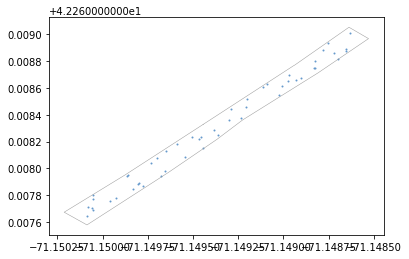

In [20]:
points, err = dotdensity.points_in_feature(populated[1], ["POP10"])
plot(populated[1], points)

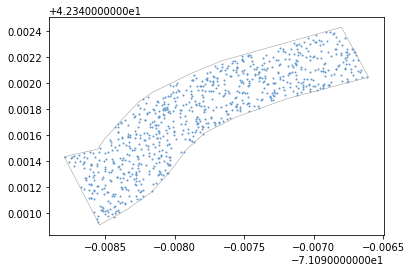

In [22]:
points, err = dotdensity.points_in_feature(populated[2], ["POP10", "HOUSING10"])
plot(populated[2], points)